# Strategy deployment

The strategy deployment cycle is explained based on an example of a simple
macd crossover strategy located at `tests/strategies/macd_crossover`.


## 1. Simulation

First let's make sure that the simulation works as expected.

In [1]:
import qubx

%qubxd

import pandas as pd
from qubx.utils import this_project_root, add_project_to_system_path
from qubx.data.helpers import InMemoryCachedReader
from qubx.backtester.simulator import simulate
from qubx.data import loader
from qubx.core.metrics import tearsheet, chart_signals


⠀⠀⡰⡖⠒⠒⢒⢦⠀⠀   
⠀⢠⠃⠈⢆⣀⣎⣀⣱⡀  QUBX | Quantitative Backtesting Environment 
⠀⢳⠒⠒⡞⠚⡄⠀⡰⠁         (c) 2025, ver. 0.5.8
⠀⠀⠱⣜⣀⣀⣈⣦⠃⠀⠀⠀ 
        


Adding folder with test strategies to python path to be able to call the imports.

In [2]:
PROJECT_ROOT = this_project_root()
assert PROJECT_ROOT is not None
add_project_to_system_path(str(PROJECT_ROOT / "tests/strategies"))

In [3]:
from macd_crossover.models.macd_crossover import MacdCrossoverStrategy

ld: InMemoryCachedReader = loader(  # type: ignore
    "BINANCE.UM", "1h", source=f"csv::{PROJECT_ROOT}/tests/data/csv_1h/", n_jobs=1
)

test0 = simulate(
    strategies=(stg:=MacdCrossoverStrategy()),
    data=ld,
    capital=100_000,
    instruments=["BINANCE.UM:BTCUSDT"],
    commissions="vip0_usdt",
    start="2023-06-01",
    stop="2023-06-10",
    debug="INFO",
)

2023-06-01 00:00:00.000 [ℹ️] SimulatedDataProvider.binance.um is initialized
2023-06-01 00:00:00.000 [ℹ️] SimulatedDataProvider ::: Simulation started at 2023-06-01 00:00:00 :::


Simulating:   0%|          | 0/100 [00:00<?, ?%/s]

2023-06-02 15:00:00.000 [ℹ️] SELL signal for BTCUSDT at 26952.0
2023-06-02 19:00:00.000 [ℹ️] BUY signal for BTCUSDT at 27183.2
2023-06-03 03:00:00.000 [ℹ️] SELL signal for BTCUSDT at 27138.5
2023-06-03 16:00:00.000 [ℹ️] BUY signal for BTCUSDT at 27292.7
2023-06-03 18:00:00.000 [ℹ️] SELL signal for BTCUSDT at 27147.6
2023-06-04 08:00:00.000 [ℹ️] BUY signal for BTCUSDT at 27141.0
2023-06-05 00:00:00.000 [ℹ️] SELL signal for BTCUSDT at 27102.4
2023-06-06 04:00:00.000 [ℹ️] BUY signal for BTCUSDT at 25719.8
2023-06-07 07:00:00.000 [ℹ️] SELL signal for BTCUSDT at 26819.5
2023-06-08 08:00:00.000 [ℹ️] BUY signal for BTCUSDT at 26431.5
2023-06-09 01:00:00.000 [ℹ️] SELL signal for BTCUSDT at 26445.8


2023-06-09 09:00:00.000 [ℹ️] BUY signal for BTCUSDT at 26632.5
2023-06-09 16:00:00.000 [ℹ️] SELL signal for BTCUSDT at 26465.1
2023-06-10 00:59:55.000 [ℹ️] SimulatedDataProvider ::: Simulation finished at 2023-06-10 00:00:00 :::


,Gain,Cagr,Sharpe,Qr,Max dd pct,Mdd usd,Sortino,Calmar,Tail ratio,Stability,Var,Avg return,Fees,Execs
,6093.911,7.664,4.268,1.58,3.136,3424.373,18.49,252.275,4.011,0.609,3756.992,0.628,1271.419,13.0


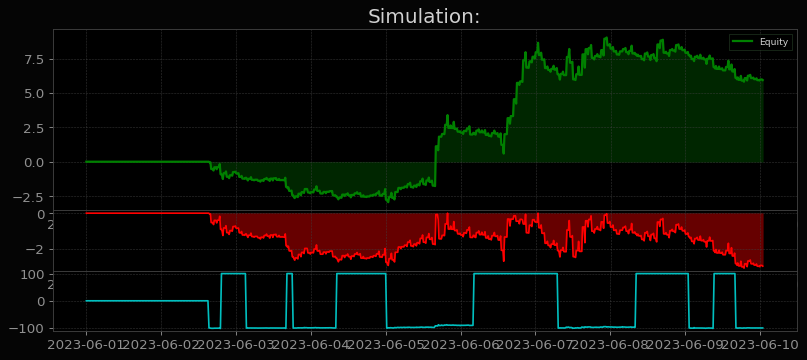

In [4]:
tearsheet(test0, plot_leverage=True)

## 2. Release

First check if the strategy can be found by the `qubx` CLI.

In [5]:
! poetry run qubx ls ../tests/strategies/macd_crossover

 - /home/yuriy/devs/Qubx/tests/strategies/macd_crossover/models/macd_crossover.py -
	.--( MacdCrossoverStrategy : MACD Crossover Strategy. 
	:  signal_period  : 9
	:  slow_period    : 26
	:  fast_period    : 12
	:  leverage       : 1.0
	:  timeframe      : 1h




We can package the strategy and all of its dependencies via `qubx release`. You can check the available options like this:

In [6]:
! poetry run qubx release --help

Usage: qubx release [OPTIONS] [DIRECTORY]

  Releases the strategy to a zip file.

  The strategy can be specified in two ways: 1. As a strategy name (class
  name) - strategies are scanned in the given directory 2. As a path to a
  config YAML file containing the strategy configuration in StrategyConfig
  format

  If a strategy name is provided, a default configuration will be generated
  with: - The strategy parameters from the strategy class - Default exchange,
  connector, and instruments from the command options - Standard logging
  configuration

  If a config file is provided, it must follow the StrategyConfig structure
  with: - strategy: The strategy name or path - parameters: Dictionary of
  strategy parameters - exchanges: Dictionary of exchange configurations -
  aux: Auxiliary configuration - logging: Logging configuration

  All of the dependencies are included in the zip file.

Options:
  -s, --strategy TEXT         Strategy name to release (should match the
           

In [11]:
! poetry run qubx release \
    -s MacdCrossoverStrategy \
    -o ../releases \
    -m "Test release" \
    ../tests/strategies/macd_crossover

2025-02-26 14:27:25.461 [ ℹ️ ] (release) Finding strategy by name: MacdCrossoverStrategy
2025-02-26 14:27:25.479 [ ℹ️ ] (release)  - Modified files -
2025-02-26 14:27:25.488 [ ⚠️ ] (release) qubx.cli.release:process_git_repo:687 -  >> Creating git tag is skipped due to --skip-tag option
2025-02-26 14:27:25.488 [ ℹ️ ] (release) Creating release pack for R_MacdCrossoverStrategy_20250226142725 ...
2025-02-26 14:27:26.303 [ ℹ️ ] (release) Generating poetry.lock file without creating virtual environment...
2025-02-26 14:27:31.766 [ ℹ️ ] (release) Created release pack: ../releases/R_MacdCrossoverStrategy_20250226142725.zip


In [2]:
! poetry run qubx deploy --force ../releases/R_MacdCrossoverStrategy_20250226142725.zip

2025-02-26 14:32:16.284 [ ⚠️ ] (deploy) qubx.cli.deploy:prepare_output_directory:66 - Removing existing directory /home/yuriy/devs/Qubx/releases/R_MacdCrossoverStrategy_20250226142725
2025-02-26 14:32:17.290 [ ℹ️ ] (deploy) Unpacking /home/yuriy/devs/Qubx/releases/R_MacdCrossoverStrategy_20250226142725.zip to /home/yuriy/devs/Qubx/releases/R_MacdCrossoverStrategy_20250226142725
2025-02-26 14:32:17.294 [ ℹ️ ] (deploy) Creating Poetry virtual environment
2025-02-26 14:32:17.295 [ ℹ️ ] (deploy) Installing dependencies
2025-02-26 14:32:33.052 [ ℹ️ ] (deploy) Strategy deployed successfully to /home/yuriy/devs/Qubx/releases/R_MacdCrossoverStrategy_20250226142725
2025-02-26 14:32:33.052 [ ℹ️ ] (deploy) To run the strategy (paper mode): cd /home/yuriy/devs/Qubx/releases/R_MacdCrossoverStrategy_20250226142725 && poetry run qubx run config.yml --paper


In [4]:
! cd ../releases/R_MacdCrossoverStrategy_20250226142725 && poetry run qubx run config.yml --paper


⠀⠀⡰⡖⠒⠒⢒⢦⠀⠀   
⠀⢠⠃⠈⢆⣀⣎⣀⣱⡀  QUBX | Quantitative Backtesting Environment 
⠀⢳⠒⠒⡞⠚⡄⠀⡰⠁         (c) 2025, ver. 0.5.8
⠀⠀⠱⣜⣀⣀⣈⣦⠃⠀⠀⠀ 
        
^C
